In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data=pd.read_csv("Loan payments data.csv")
print(data.shape)
data.head()

(500, 11)


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
#Lets start by cleaning the data first
data.isnull().sum() #so there are null values

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [4]:
#Education field has to be hierarchical, i.e. higher education should weigh more than the education level that
#of the high school or below
data['education'].value_counts()
# we can better encode the values instead of dummifying it
list_edu=[]
for i in data['education']:
    list_edu.append(i)
l=LabelEncoder()
l.fit(list_edu)
l1=l.transform(list_edu)
#l1

#Similarly for gender we need to encode 
list_gen=[]
for i in data['Gender']:
    list_gen.append(i)
l.fit(list_gen)
l2=l.transform(list_gen)

list_loan_stat=[]
for i in data['loan_status']:
    list_loan_stat.append(i)
l.fit(list_loan_stat)
l3=l.transform(list_loan_stat)


In [5]:
#Transforming it into a new dataframe
new_data=pd.DataFrame({'loan_status':l3,'Principal':data['Principal'],'terms':data['terms'],'age':data['age'],'education':l1,'Gender':l2,'loan_status':data['loan_status'],'past_due_days':data['past_due_days']})

In [6]:
new_data.head()

,Gender,Principal,age,education,loan_status,past_due_days,terms
0,1,1000,45,1,PAIDOFF,NaN,30
1,0,1000,50,0,PAIDOFF,NaN,30
2,0,1000,33,0,PAIDOFF,NaN,30
3,1,1000,27,3,PAIDOFF,NaN,15
4,0,1000,28,3,PAIDOFF,NaN,30


In [7]:
new_data['past_due_days']=new_data['past_due_days'].fillna(0)
new_data.head()

,Gender,Principal,age,education,loan_status,past_due_days,terms
0,1,1000,45,1,PAIDOFF,0.0,30
1,0,1000,50,0,PAIDOFF,0.0,30
2,0,1000,33,0,PAIDOFF,0.0,30
3,1,1000,27,3,PAIDOFF,0.0,15
4,0,1000,28,3,PAIDOFF,0.0,30


**For Gender**
- 0 --- Female

- 1 --- Male

**For education**
- 0 --- Bachelor

- 1 --- High School or below
- 2 --- Master or Above
- 3 --- college

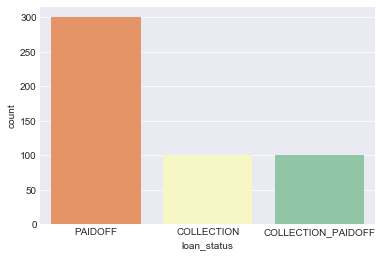

In [8]:
sns.set_style('darkgrid')
sns.countplot(new_data['loan_status'], palette='Spectral')
#Here as per the given distribution, we can see that maximum loan has been paid off by the customers
#about equal no of defaulters i.e. collection and collection paid off is there
# We can see that there is an approximate 3:1:1 ratio between paidoff, collection, and collection_paidoff

In [9]:
data[['loan_status','Principal','Loan_ID']].groupby(['loan_status','Principal']).agg(['count'])

Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220

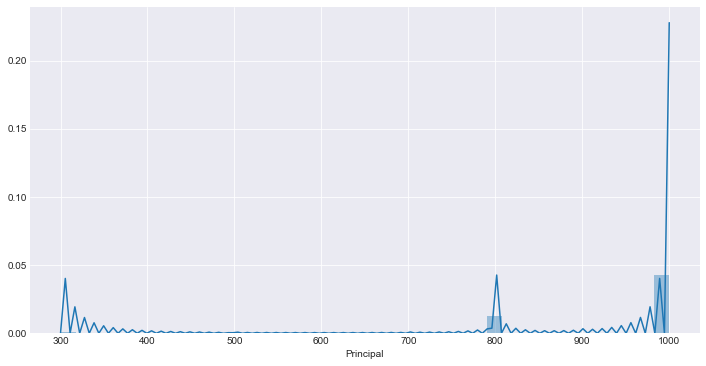

In [10]:
fig=plt.figure(figsize=(12,6))
sns.distplot(data['Principal'], bins=40)

#we can see that most of the principal amount is at 1000

Text(0.5,1,'Term Counts')

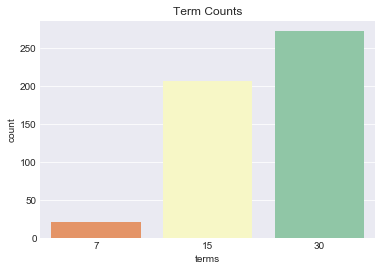

In [11]:
data['terms'].value_counts()
#lets visualize this figure
ax= sns.countplot(data['terms'], palette='Spectral')
ax.set_title('Term Counts')
#there are more number of loan terms of 30 days than those of 15 and 7 respectively

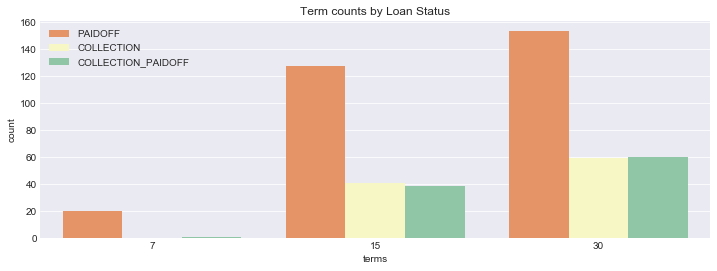

In [12]:
fig, ax=plt.subplots(figsize=(12,4))
sns.countplot(x='terms', hue='loan_status', data=data, palette='Spectral')
ax.set_title('Term counts by Loan Status')
ax.legend(loc='upper left')
#We can see here that most of the loan defaulters are having term 30 and 15, with no of defaulters in
#term 30 being the most

In [13]:
data['Days to pay']= (pd.DatetimeIndex(data['paid_off_time']).normalize()
                        -pd.DatetimeIndex(data['effective_date']).normalize())/np.timedelta64(1,'D')
#Computing the days to pay by subtracting effective data from paid off time

In [14]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Days to pay
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,6.0
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,29.0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,17.0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,14.0
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,14.0


In [15]:
data['paid_off_date'] = pd.DatetimeIndex(data['paid_off_time']).normalize()
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Days to pay,paid_off_date
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,6.0,2016-09-14
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,29.0,2016-10-07
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,17.0,2016-09-25
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,14.0,2016-09-22
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,14.0,2016-09-23


[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0'),
 Text(0,0,'16.0'),
 Text(0,0,'17.0'),
 Text(0,0,'18.0'),
 Text(0,0,'19.0'),
 Text(0,0,'20.0'),
 Text(0,0,'21.0'),
 Text(0,0,'22.0'),
 Text(0,0,'23.0'),
 Text(0,0,'24.0'),
 Text(0,0,'25.0'),
 Text(0,0,'26.0'),
 Text(0,0,'27.0'),
 Text(0,0,'28.0'),
 Text(0,0,'29.0'),
 Text(0,0,'30.0'),
 Text(0,0,'31.0'),
 Text(0,0,'32.0'),
 Text(0,0,'33.0'),
 Text(0,0,'35.0'),
 Text(0,0,'36.0'),
 Text(0,0,'37.0'),
 Text(0,0,'38.0'),
 Text(0,0,'41.0'),
 Text(0,0,'43.0'),
 Text(0,0,'44.0'),
 Text(0,0,'45.0'),
 Text(0,0,'48.0'),
 Text(0,0,'49.0'),
 Text(0,0,'52.0'),
 Text(0,0,'53.0'),
 Text(0,0,'54.0'),
 Text(0,0,'56.0'),
 Text(0,0,'57.0'),
 Text(0,0,'58.0'),
 Text(0,0,'59.0'),
 Text(0,0,'60.0'),
 Text(0,0,'64.0'),
 Te

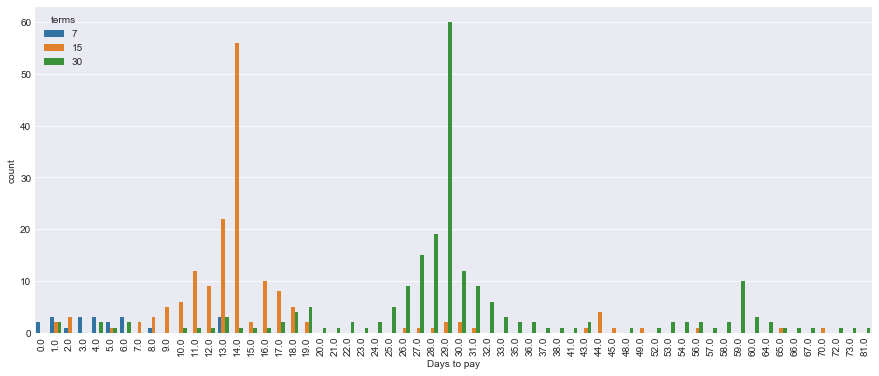

In [16]:


fig, ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(x='Days to pay',hue='terms',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#This is a collection of records of payment in days for different terms, we see that maximum number of people
#pay their loans on 29th day for a term day of 30 days and we see similar reports for 15 day terms
#but interestingly the most people with 7 day term pay much before their schedule
#but this does not give the clear picture we need to see the people who have paid off within the stipulated time

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0'),
 Text(0,0,'16.0'),
 Text(0,0,'17.0'),
 Text(0,0,'18.0'),
 Text(0,0,'19.0'),
 Text(0,0,'20.0'),
 Text(0,0,'21.0'),
 Text(0,0,'22.0'),
 Text(0,0,'23.0'),
 Text(0,0,'24.0'),
 Text(0,0,'25.0'),
 Text(0,0,'26.0'),
 Text(0,0,'27.0'),
 Text(0,0,'28.0'),
 Text(0,0,'29.0'),
 Text(0,0,'30.0'),
 Text(0,0,'44.0'),
 Text(0,0,'59.0')]

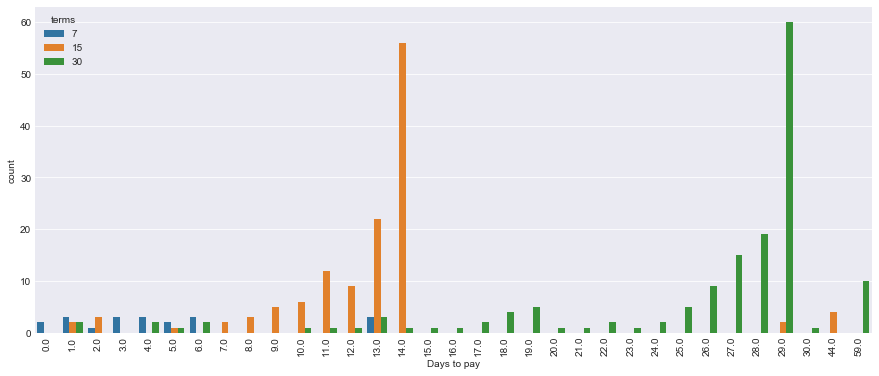

In [17]:
fig, ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(x='Days to pay', hue='terms', data=data[data['loan_status']== 'PAIDOFF'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#as we are looking at the results of those people who are non defaulters. We can clearly see that
#there are some records which are incorrect people who fall under the category of paidoff they have
#made their payments in 32 and 59 days for 30 day payment term
#where as indivudual with payment term of 15 days has paid in 44 and 29 days
#these people have incorrect records

In [18]:
tmp = data.loc[(data['Days to pay'] > 30) & (data['loan_status'] == 'PAIDOFF')]
print("{}: Incorrect status: {} observations")
print(tmp[['loan_status', 'terms', 'effective_date', 'due_date', 'paid_off_time']]) #the difference for first observation
#is 59 days so we can see that these records are incorrect

{}: Incorrect status: {} observations
    loan_status  terms effective_date    due_date     paid_off_time
85      PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
111     PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
122     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
137     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
146     PAIDOFF     30      9/11/2016   11/9/2016   11/9/2016 23:00
150     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
165     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
196     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
206     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
215     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
222     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
230     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
272     PAIDOFF     30      9/14/2016  11/12/2016   11/12/2016 9:00
285     PA

Text(0.5,1,'Education of the gender')

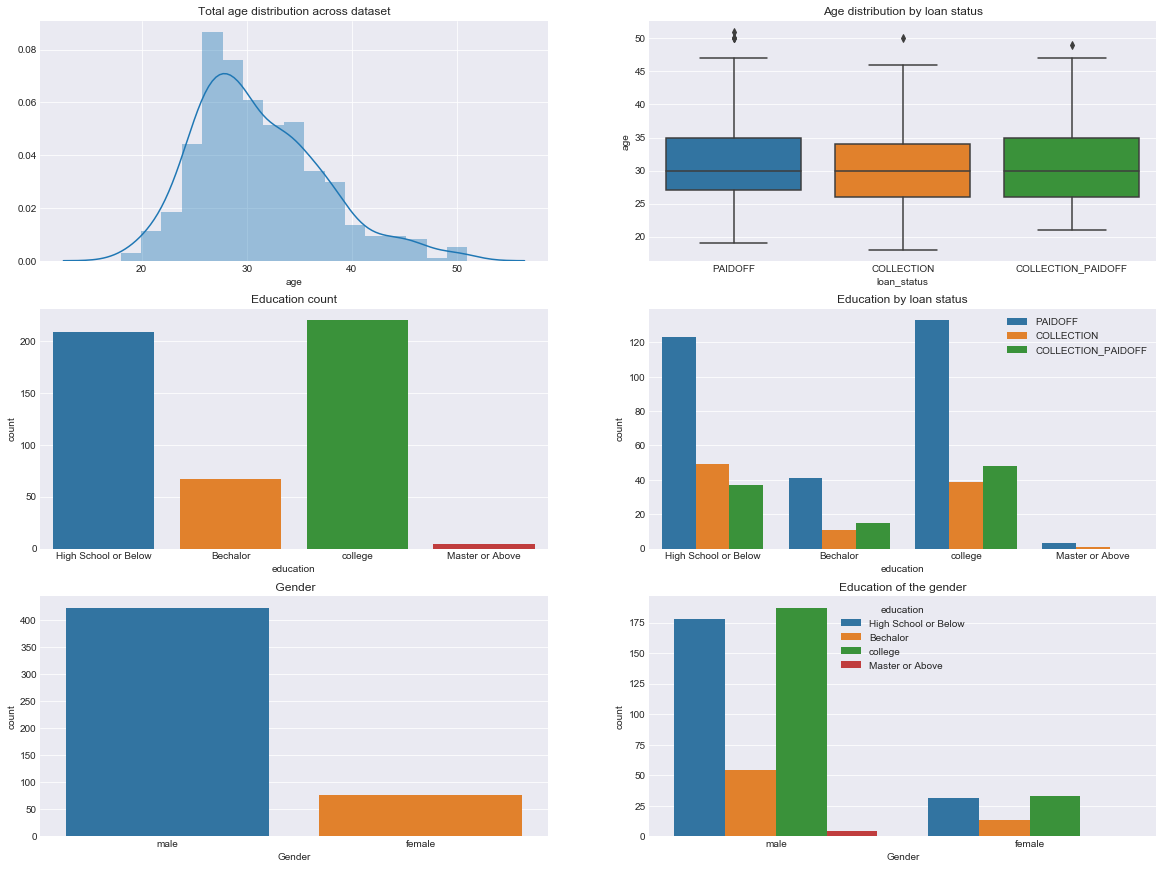

In [19]:
## exploring demographic
fig, axs=plt.subplots(3,2, figsize=(20,15))

sns.distplot(data['age'], ax=axs[0][0])
axs[0][0].set_title("Total age distribution across dataset")

sns.boxplot(x='loan_status', y='age', data=data, ax=axs[0][1])
axs[0][1].set_title("Age distribution by loan status")

sns.countplot(x='education', data=data, ax=axs[1][0])
axs[1][0].set_title("Education count")


sns.countplot(x='education', data=data, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
axs[1][1].legend(loc='upper right')


sns.countplot(x='Gender', data=data, ax=axs[2][0])
axs[2][0].set_title(" Gender")

sns.countplot(x='Gender', data=data, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")

In [20]:
## exploring gender +education 
pd.crosstab(data['loan_status'], data['Gender'] + "_" + data['education'], margins=True)
#There are less number of students who are graduated and defaulted
#Mostly college students have defaulted but their collection has been completed
#Mostly male high school students are defaulted and their payment is in the process of being collected

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


In [21]:
pd.crosstab(data['loan_status'],data['Gender']+"_"+data['education'],margins=True,normalize='all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000,0.014,0.006,0.022,0.084,0.002,0.072,0.2
COLLECTION_PAIDOFF,0.002,0.010,0.016,0.028,0.064,0.000,0.080,0.2
PAIDOFF,0.024,0.038,0.044,0.058,0.208,0.006,0.222,0.6
All,0.026,0.062,0.066,0.108,0.356,0.008,0.374,1.0


In [22]:
pd.crosstab(data['loan_status'],data['Gender']+"_"+data['education'],margins=True,normalize='index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0.000,0.070000,0.030000,0.110000,0.420000,0.010,0.360
COLLECTION_PAIDOFF,0.010,0.050000,0.080000,0.140000,0.320000,0.000,0.400
PAIDOFF,0.040,0.063333,0.073333,0.096667,0.346667,0.010,0.370
All,0.026,0.062000,0.066000,0.108000,0.356000,0.008,0.374


In [23]:
pd.crosstab(data['loan_status'],data['Gender']+"_"+data['education'],margins=True,normalize='columns')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


# Feature Engineering

In [24]:
data.loc[(data['loan_status'] =='PAIDOFF' ) &(data['Days to pay']>30),'loan_status']='COLLECTION_PAIDOFF'

In [25]:
#correcting the data.ie. those data that showed paidoff but had payment completed in 44 days and above
smap= {"PAIDOFF": 0, "COLLECTION": 1, "COLLECTION_PAIDOFF": 1 }
data['loan_status_trgt'] = data['loan_status'].map(smap)
data.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Days to pay,paid_off_date,loan_status_trgt
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,6.0,2016-09-14,0
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,29.0,2016-10-07,0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,17.0,2016-09-25,0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,14.0,2016-09-22,0
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,14.0,2016-09-23,0


## we have assigned 0 for indiviuals who we have paid their loans, since individuals who have
## paid their loans are in majority, hence when we apply models like logistic regression
## we are effectively looking for probability of failure to pay loans

Text(0.5,1,'Count with new targets')

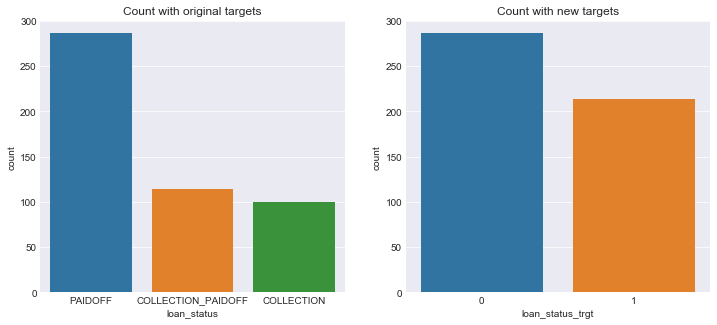

In [26]:
fig, axs=plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='loan_status',data=data,ax=axs[0])
axs[0].set_title('Count with original targets')

sns.countplot(x='loan_status_trgt', data=data, ax=axs[1])
axs[1].set_title('Count with new targets')

In [27]:
# dummies=pd.get_dummies(data['education']).rename(columns=lambda x:'is_' +str(x))
# data=pd.concat([data,dummies],axis=1)
# data.drop(['education'],axis=1,inplace=True)

In [28]:
dummies=pd.get_dummies(data['Gender']).rename(columns=lambda x:'is_' +str(x))
data=pd.concat([data,dummies],axis=1)
data.drop(['Gender'],axis=1,inplace=True)

In [29]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Days to pay,paid_off_date,loan_status_trgt,is_female,is_male
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,6.0,2016-09-14,0,0,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,29.0,2016-10-07,0,1,0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,17.0,2016-09-25,0,1,0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,14.0,2016-09-22,0,0,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,14.0,2016-09-23,0,1,0


In [30]:
#new=data['past_due_days']
# cols_with_missing = (col for col in data.past_due_days 
#                                  if data[col].isnull().any():
#                     )
# for col in cols_with_missing:
#     data[col + '_was_missing'] = data[col].isnull()
data.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date',
             'paid_off_time','paid_off_date', 'Days to pay'], axis=1,inplace=True)
# new['past_due_days']=data['']
# new.isnull().sum()

In [31]:
data['education']=new_data['education']
data['past_due_days']=data['past_due_days'].fillna(0)
#we have observed here that past due days have been assigned as NAN for those individuals who had already PAID OFF
#Their loans so it is only appropriate if we assign 0 to those columns

In [32]:
data.head()

,Principal,terms,past_due_days,age,education,loan_status_trgt,is_female,is_male
0,1000,30,0.0,45,1,0,0,1
1,1000,30,0.0,50,0,0,1,0
2,1000,30,0.0,33,0,0,1,0
3,1000,15,0.0,27,3,0,0,1
4,1000,30,0.0,28,3,0,1,0


# Modeling
# Logistic Regression

In [56]:
y=data['loan_status_trgt']
X=data.drop(['loan_status_trgt'], axis=1).values

In [57]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X=scaler.fit_transform(X)
# X

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=21)

In [59]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
pred=logreg.predict(X_test)

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [61]:
conf=metrics.confusion_matrix(y_test, pred)
print(metrics.confusion_matrix(y_test, pred))

[[91  0]
 [ 6 53]]


In [62]:
logreg.score(X_test, y_test)

0.95999999999999996

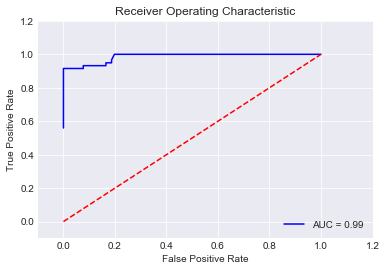

In [63]:
# ROC curve on Predicted probabilities
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.986217


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

In [41]:
conf=metrics.confusion_matrix(y_test, pred)
print(metrics.confusion_matrix(y_test, pred))

[[90  1]
 [ 5 54]]


In [42]:
rf.score(X_test, y_test)

0.95999999999999996

In [43]:
cross_val_score(rf,X,y,cv=6)

array([ 0.83333333,  0.98809524,  0.98809524,  1.        ,  1.        ,
        0.97560976])

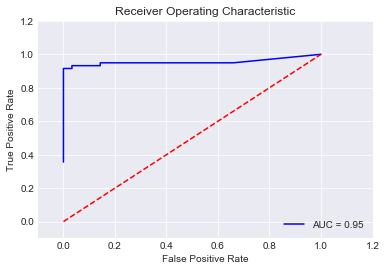

In [47]:
# ROC curve on Predicted probabilities
predict_probabilities = rf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.954833


# Support Vector Classifier

In [48]:
from sklearn.svm import SVC

In [52]:


clf=SVC(C=100, probability=True)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
conf=metrics.confusion_matrix(y_test, pred)
print(metrics.confusion_matrix(y_test, pred))



[[84  7]
 [ 9 50]]


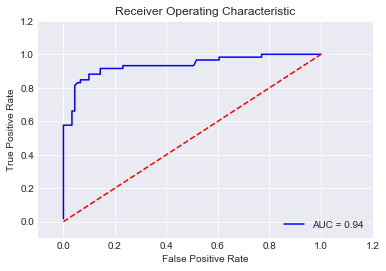

In [53]:
# ROC curve on Predicted probabilities
predict_probabilities = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.935835


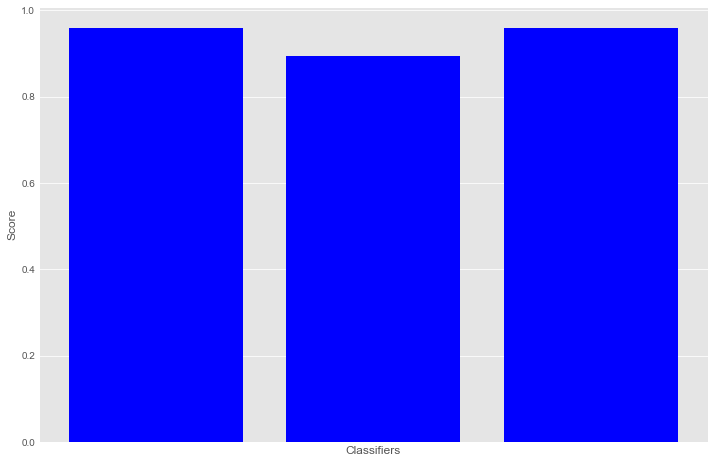

In [87]:
x=[1.5,2.5,3.5]
y=[logreg.score(X_test, y_test), clf.score(X_test, y_test), rf.score(X_test, y_test)]
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x,y,color='blue')
plt.xticks(range(12,8),['Logistic Regression','SupportVector','Random Forest'])

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.show()